In [ ]:
import pandas as pd

# Load datasets
train_data = pd.read_csv("KDDTrain+_2.csv", header=None)
test_data = pd.read_csv("KDDTest+_2.csv", header=None)

# Assign column names
column_names = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes",
    "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in",
    "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations",
    "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login",
    "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate",
    "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count",
    "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate",
    "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "attack_type"
]

train_data.columns = column_names
test_data.columns = column_names

# Combine both datasets
data = pd.concat([train_data, test_data], ignore_index=True)

# Shuffle the data
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"Dataset shape after merging: {data.shape}")

Dataset shape after merging: (148517, 42)


In [ ]:
data.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,udp,domain_u,SF,44,115,0,0,0,0,...,248,0.97,0.01,0.00,0.00,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,248,1273,0,0,0,0,...,255,1.00,0.00,0.03,0.03,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,310,1957,0,0,0,0,...,241,1.00,0.00,0.09,0.08,0.0,0.0,0.0,0.0,normal


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148517 entries, 0 to 148516
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148517 non-null  int64  
 1   protocol_type                148517 non-null  object 
 2   service                      148517 non-null  object 
 3   flag                         148517 non-null  object 
 4   src_bytes                    148517 non-null  int64  
 5   dst_bytes                    148517 non-null  int64  
 6   land                         148517 non-null  int64  
 7   wrong_fragment               148517 non-null  int64  
 8   urgent                       148517 non-null  int64  
 9   hot                          148517 non-null  int64  
 10  num_failed_logins            148517 non-null  int64  
 11  logged_in                    148517 non-null  int64  
 12  num_compromised              148517 non-null  int64  
 13 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("darkgrid")
plt.style.use("dark_background")

catppuccin_colors = {
    "blue": "#89b4fa",
    "red": "#F38BA8",
    "lavender": "#CBA6F7",
}

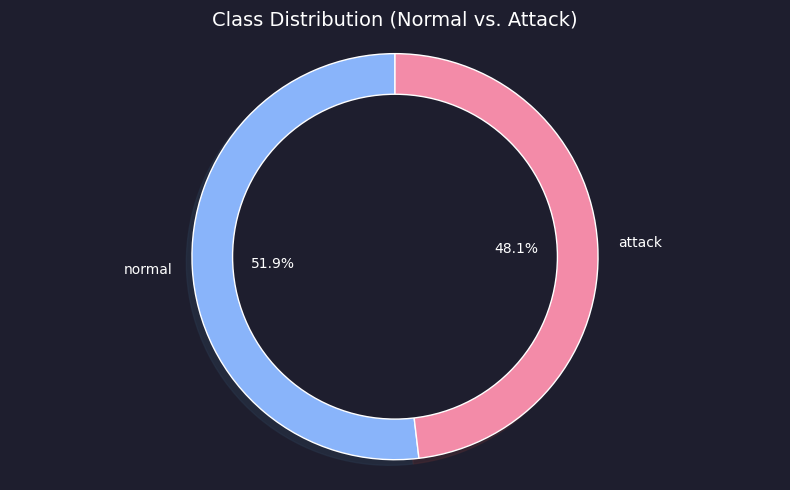

In [ ]:
# Class Distribution
data["attack_type"] = data["attack_type"].apply(lambda x: "normal" if x == "normal" else "attack")
class_counts = data["attack_type"].value_counts()

fig, ax = plt.subplots(figsize=(8, 5))
fig.patch.set_facecolor("#1e1e2e")  # Set background

# Donut Pie Chart
wedges, texts, autotexts = ax.pie(
    class_counts,
    labels=class_counts.index,
    colors=[catppuccin_colors["blue"], catppuccin_colors["red"]],
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    textprops={'color': 'white'}
)

# Add center circle for donut effect
centre_circle = plt.Circle((0, 0), 0.8, fc="#1e1e2e")
ax.add_artist(centre_circle)

ax.set_title("Class Distribution (Normal vs. Attack)", fontsize=14, color='white')
plt.axis('equal')
plt.tight_layout()
plt.show()

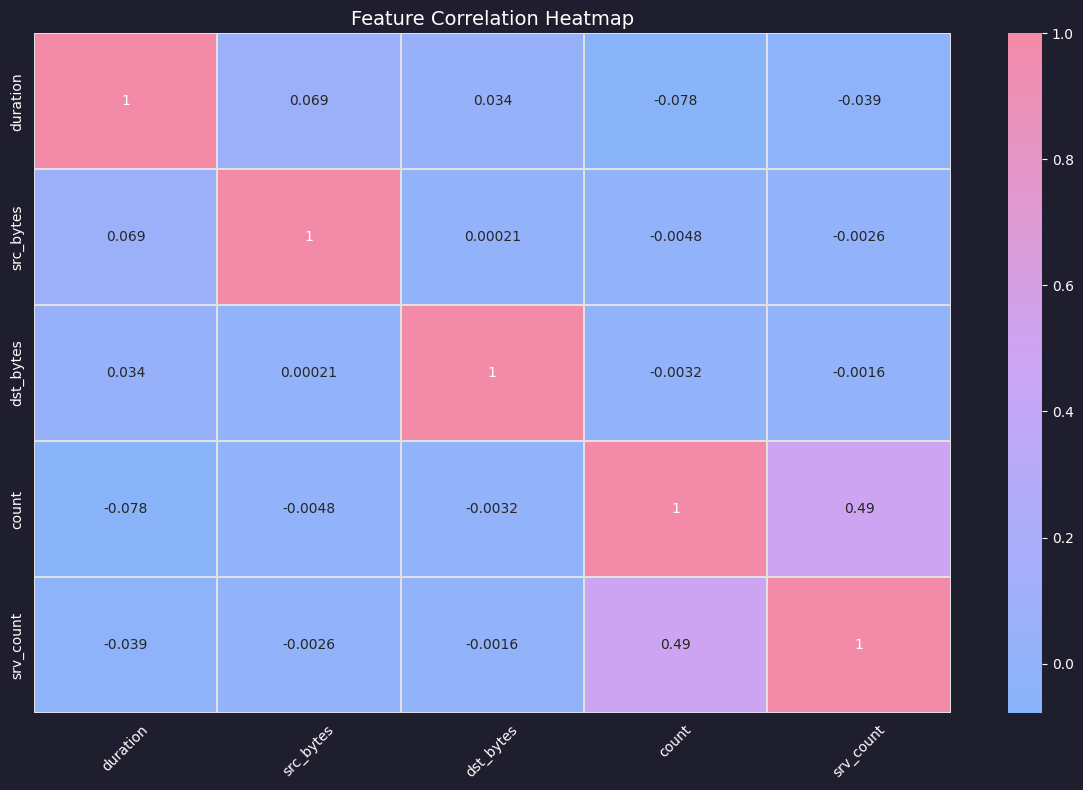

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
# Create a custom colormap for the heatmap
cmap = LinearSegmentedColormap.from_list("custom_heatmap", [catppuccin_colors["blue"], catppuccin_colors["lavender"], catppuccin_colors["red"]], N=256)

# Select key numerical features for visualization
num_features = ["duration", "src_bytes", "dst_bytes", "count", "srv_count"]
corr = data[num_features].corr()

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor("#1e1e2e")
ax.set_facecolor("#1e1e2e")

sns.heatmap(
    corr,
    annot=True,
    cmap=cmap,
    linewidths=0.1,
    linecolor="#e1e1e1",
    cbar_kws={"ticks": np.arange(-1, 1.1, 0.2)},
    ax=ax
)

ax.set_title("Feature Correlation Heatmap", fontsize=14, color="white")
ax.tick_params(axis='both', colors='white')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

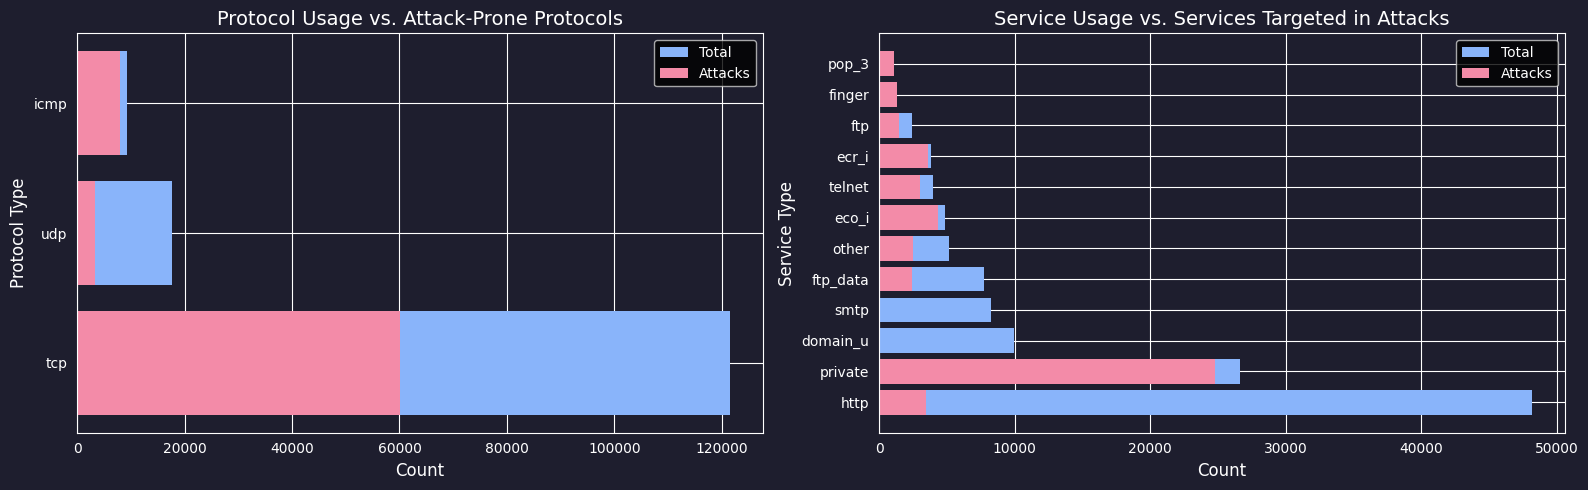

In [ ]:
protocol_counts = data["protocol_type"].value_counts()
attack_protocol_counts = data[data["attack_type"] == "attack"]["protocol_type"].value_counts()

# Count top 10 services overall
service_counts = data["service"].value_counts().nlargest(10)
attack_service_counts = data[data["attack_type"] == "attack"]["service"].value_counts().nlargest(10)

# Create figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
fig.patch.set_facecolor("#1e1e2e")

for ax in axs:
    ax.set_facecolor("#1e1e2e")  # Set inner plot background
    ax.tick_params(colors="white")
    ax.xaxis.label.set_color("white")
    ax.yaxis.label.set_color("white")

# Plot Protocol Usage vs. Attack-Prone Protocols
axs[0].barh(protocol_counts.index, protocol_counts.values, color=catppuccin_colors["blue"], label="Total", edgecolor='none')
axs[0].barh(attack_protocol_counts.index, attack_protocol_counts.values, color=catppuccin_colors["red"], label="Attacks", edgecolor='none')
axs[0].set_xlabel("Count", fontsize=12)
axs[0].set_ylabel("Protocol Type", fontsize=12)
axs[0].set_title("Protocol Usage vs. Attack-Prone Protocols", fontsize=14, color="white")
axs[0].legend()

# Plot Service Usage vs. Services Targeted in Attacks
axs[1].barh(service_counts.index, service_counts.values, color=catppuccin_colors["blue"], label="Total", edgecolor='none')
axs[1].barh(attack_service_counts.index, attack_service_counts.values, color=catppuccin_colors["red"], label="Attacks", edgecolor='none')
axs[1].set_xlabel("Count", fontsize=12)
axs[1].set_ylabel("Service Type", fontsize=12)
axs[1].set_title("Service Usage vs. Services Targeted in Attacks", fontsize=14, color="white")
axs[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
#Data Preprocessing Encoding & Scaling
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Apply Label Encoding to categorical columns
label_encoders = {}
categorical_columns = ["protocol_type", "service", "flag"]

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Store encoders for reuse

# Encode target variable (`attack_type`)
le_target = LabelEncoder()
data["attack_type"] = le_target.fit_transform(data["attack_type"])

# Separate features & target
X = data.drop(["dst_host_srv_rerror_rate", "attack_type"], axis=1)
y = data["attack_type"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Preprocessing completed! Encoded categorical variables and scaled features.")

Preprocessing completed! Encoded categorical variables and scaled features.


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# Initialize dictionary to store results
model_results = {}

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Encode the target variable
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

#train the Linear Regression model again
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

# Evaluate
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred))

Linear Regression MSE: 11.90277038918663


In [ ]:
from sklearn.linear_model import LogisticRegression
# Logistic Regression
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
acc_log = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {acc_log:.4f}")
f1_log = f1_score(y_test, y_pred_log, average="weighted")
model_results["Logistic Regression"] = (acc_log, f1_log)

Logistic Regression Accuracy: 0.8090


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average="weighted")
model_results["KNN"] = (acc_knn, f1_knn)
print("KNN Accuracy:", acc_knn)

KNN Accuracy: 0.9788244007541071


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average="weighted")
model_results["Decision Tree"] = (acc_dt, f1_dt)
print("Decision Tree Accuracy:", acc_dt)

Decision Tree Accuracy: 0.9924589280904929


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average="weighted")
model_results["Random Forest"] = (acc_rf, f1_rf)

print("Random Forest Accuracy:", acc_rf)

Random Forest Accuracy: 0.9940075410719095


In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42, max_iter=1000)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

acc_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average="weighted")
model_results["SVM"] = (acc_svm, f1_svm)

print("Support Vector Machine Accuracy: ", acc_svm)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Support Vector Machine Accuracy:  0.3877592243468893


In [ ]:
# Print all results
print("\nModel Performance:")
for model, (acc, f1) in model_results.items():
    print(f"{model} → Accuracy: {acc:.4f}, F1-Score: {f1:.4f}")


Model Performance:
Logistic Regression → Accuracy: 0.8090, F1-Score: 0.7450
KNN → Accuracy: 0.9788, F1-Score: 0.9781
Decision Tree → Accuracy: 0.9925, F1-Score: 0.9924
Random Forest → Accuracy: 0.9940, F1-Score: 0.9935
SVM → Accuracy: 0.3878, F1-Score: 0.3593


In [ ]:
pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 4.9 MB/s eta 0:00:00


In [ ]:
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score

In [ ]:
search_space = {
    'n_estimators': Integer(100, 300),
    'max_depth': Integer(10, 50),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 5),
    'criterion': Categorical(['gini', 'entropy', 'log_loss'])
}

In [ ]:
rf = RandomForestClassifier(random_state=42)

opt = BayesSearchCV(
    estimator=rf,
    search_spaces=search_space,
    scoring=make_scorer(f1_score, average='weighted'),
    n_iter=30,                # Number of search iterations
    cv=5,                     # 5-fold cross-validation
    n_jobs=-1,                # Use all processors
    verbose=2,
    random_state=42
)

In [ ]:
opt.fit(X_train_scaled, y_train)

print("Best Parameters from Bayesian Optimization:\n", opt.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters from Bayesian Optimization:
 OrderedDict([('criterion', 'log_loss'), ('max_depth', 24), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 140)])


In [ ]:
#training with best parameters
from sklearn.ensemble import RandomForestClassifier

best_rf = RandomForestClassifier(
    criterion='log_loss',
    max_depth=24,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=140,
    random_state=42
)

best_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='log_loss', max_depth=24, n_estimators=140,
                       random_state=42)

In [ ]:
# Mapping class numbers to original labels
label_mapping = dict(zip(range(len(le_target.classes_)), le_target.classes_))

for class_num, class_label in label_mapping.items():
    print(f"Class {class_num} → {class_label}")

Class 0 → apache2
Class 1 → back
Class 2 → buffer_overflow
Class 3 → ftp_write
Class 4 → guess_passwd
Class 5 → httptunnel
Class 6 → imap
Class 7 → ipsweep
Class 8 → land
Class 9 → loadmodule
Class 10 → mailbomb
Class 11 → mscan
Class 12 → multihop
Class 13 → named
Class 14 → neptune
Class 15 → nmap
Class 16 → normal
Class 17 → perl
Class 18 → phf
Class 19 → pod
Class 20 → portsweep
Class 21 → processtable
Class 22 → ps
Class 23 → rootkit
Class 24 → saint
Class 25 → satan
Class 26 → sendmail
Class 27 → smurf
Class 28 → snmpgetattack
Class 29 → snmpguess
Class 30 → spy
Class 31 → sqlattack
Class 32 → teardrop
Class 33 → udpstorm
Class 34 → warezclient
Class 35 → warezmaster
Class 36 → worm
Class 37 → xlock
Class 38 → xsnoop
Class 39 → xterm


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score

y_pred = best_rf.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
fs = f1_score(y_test, y_pred, average='weighted')
cr = classification_report(y_test, y_pred)

print("Accuracy:", acc)
print("F1 Score:", fs)
print("\nClassification Report:\n", cr)

Accuracy: 0.9940748720711016
F1 Score: 0.9936380931055492

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       154
           1       1.00      0.99      1.00       257
           2       1.00      0.75      0.86        12
           3       1.00      0.33      0.50         3
           4       1.00      0.96      0.98       250
           5       1.00      0.96      0.98        26
           6       1.00      0.60      0.75         5
           7       1.00      0.99      1.00       742
           8       0.67      0.33      0.44         6
           9       0.00      0.00      0.00         1
          10       1.00      1.00      1.00        58
          11       0.99      0.99      0.99       196
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         2
          14       1.00      1.00      1.00      9274
          15       0.99      1.00      0.99       32

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


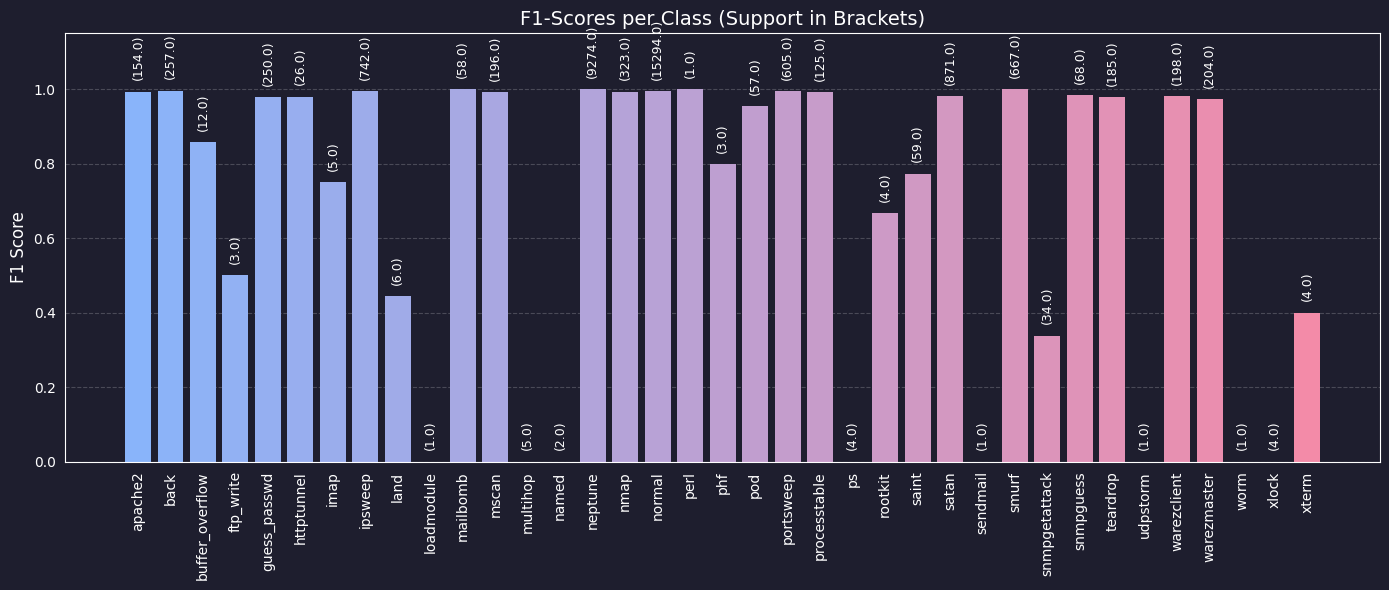

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from matplotlib.colors import LinearSegmentedColormap

# Catppuccin gradient
catppuccin_cmap = LinearSegmentedColormap.from_list("catppuccin", ["#89b4fa", "#F38BA8"])

# Classification report
report_dict = classification_report(y_test, y_pred, output_dict=True)

f1_scores = []
supports = []
labels = []

for cls in report_dict:
    if cls not in ['accuracy', 'macro avg', 'weighted avg']:
        labels.append(label_mapping[int(cls)])
        f1_scores.append(report_dict[cls]['f1-score'])
        supports.append(report_dict[cls]['support'])

# Normalize for gradient colors
norm = plt.Normalize(0, len(f1_scores) - 1)
colors = [catppuccin_cmap(norm(i)) for i in range(len(f1_scores))]

# Plot setup
fig, ax = plt.subplots(figsize=(14, 6))
fig.patch.set_facecolor("#1e1e2e")
ax.set_facecolor("#1e1e2e")

# Bars with no white border
bars = ax.bar(labels, f1_scores, color=colors, edgecolor='none')

# Annotate support values above bars
for bar, support in zip(bars, supports):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 0.03,
        f"({support})",
        ha='center',
        va='bottom',
        color='white',
        fontsize=9,
        rotation=90
    )

# Styling
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=90, color='white')
ax.set_ylim(0, 1.15)
ax.set_title("F1-Scores per Class (Support in Brackets)", fontsize=14, color='white')
ax.set_ylabel("F1 Score", fontsize=12, color='white')
ax.tick_params(colors='white')
ax.grid(axis='y', linestyle='--', alpha=0.2)
ax.grid(axis='x', alpha=0)

plt.tight_layout()
plt.show()